In [39]:
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("ILI_2009_2010.csv")
df

,index,Release_Week,Region,Week,Sites_Reporting,Total_Patient_Visits,Total_ILI,Perc_Unweighted_ILI,Perc_Weighted_ILI
0,0,949,Region 1,200935,96,64093,257,0.40100,0.62755
1,1,949,Region 1,200936,96,53552,265,0.49480,0.83766
2,2,949,Region 1,200937,99,73590,478,0.64950,1.04911
3,3,949,Region 1,200938,101,76099,622,0.81740,1.06889
4,4,949,Region 1,200939,102,73743,614,0.83260,1.16454
...,...,...,...,...,...,...,...,...,...
305,305,950,Region 10,200946,59,15546,450,2.89464,2.95378
306,306,950,Region 10,200947,56,9422,216,2.29251,2.34079
307,307,950,Region 10,200948,54,14150,268,1.89399,1.63349
308,308,950,Region 10,200949,48,10527,176,1.67189,1.39328


## Data Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
df_subset = df[["Sites_Reporting", "Total_ILI"]]

In [43]:
standardscaler = StandardScaler()

In [44]:
x_scaled = standardscaler.fit_transform(df_subset)

## K-Means

In [59]:
from sklearn.cluster import KMeans

In [60]:
df['Release_Week'].unique()

array([949, 950], dtype=int64)

In [61]:
model_kmeans = KMeans(n_clusters = 2, random_state = 0)

In [62]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=0)

In [63]:
labels = model_kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Evaluasi KMeans dengan cros Tab

In [64]:
df_kmeans=pd.DataFrame({'labels':labels, 'Release_Week':df.Release_Week})

In [65]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['Release_Week'])

In [66]:
print(ct1)

Release_Week  949  950
labels                
0             106  115
1              44   45


## Visualisasi Model K-Means

In [67]:
xs = x_scaled[:,0]
ys = x_scaled[:,1]
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

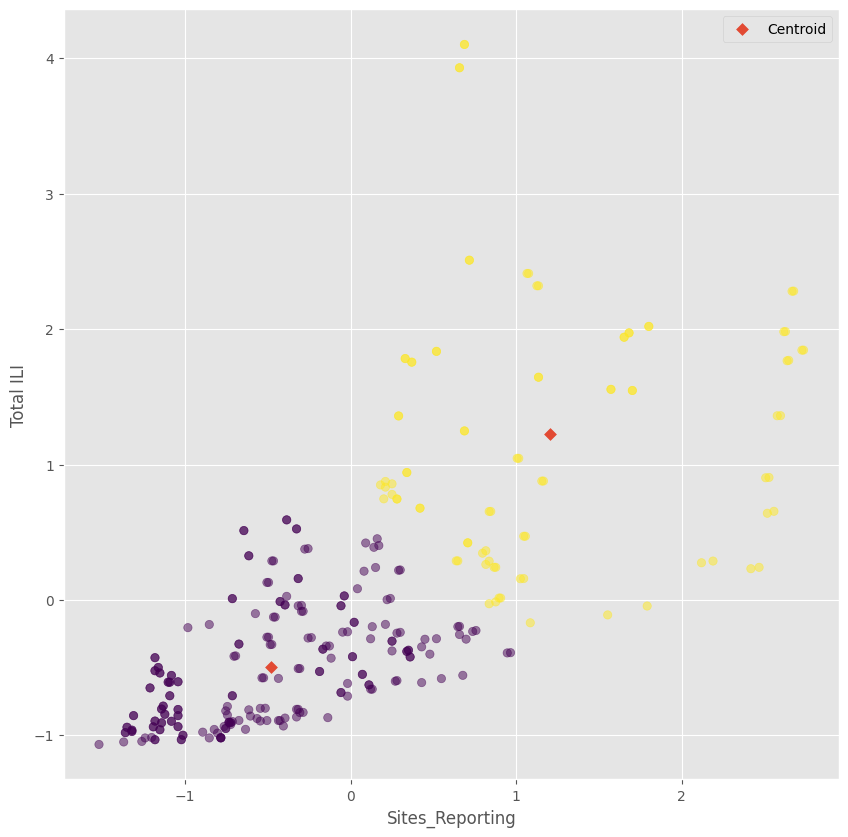

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.scatter(xs,ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker = 'D')
plt.xlabel("Sites_Reporting")
plt.ylabel("Total ILI")
plt.legend()
plt.show()

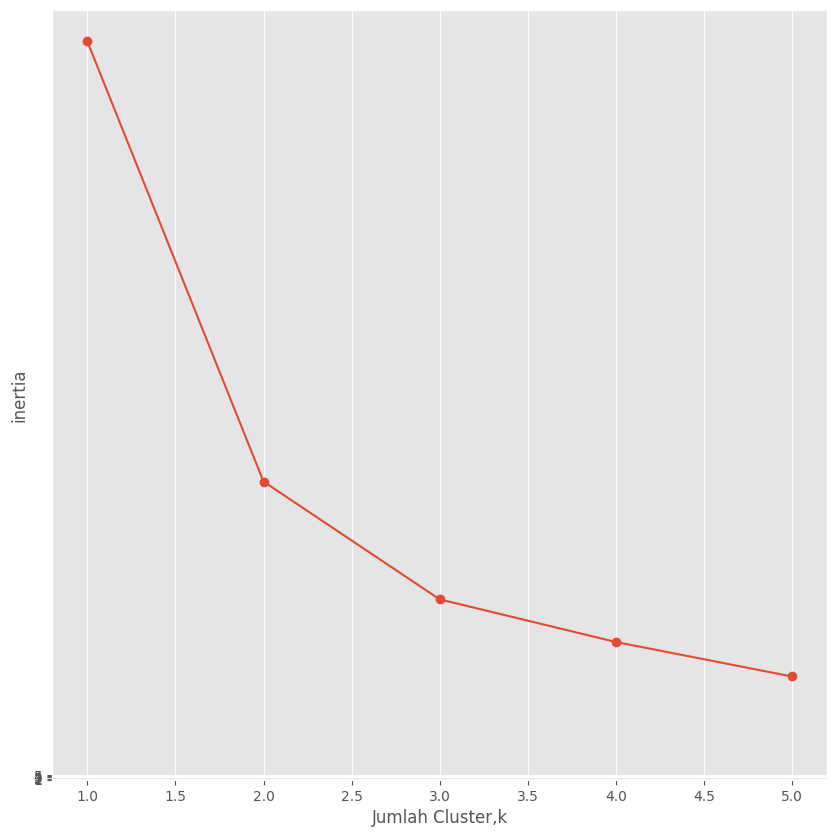

In [69]:
ks = range(1,6)
inertias = []
for k in ks:
    model =KMeans(n_clusters = k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster,k')
plt.ylabel('inertia')
plt.yticks(ks)
plt.show()

## Agglomerative Clustering - SKlearn

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
hc_clustering = AgglomerativeClustering(n_clusters=3)

In [72]:
aggclus = hc_clustering.fit_predict(x_scaled)

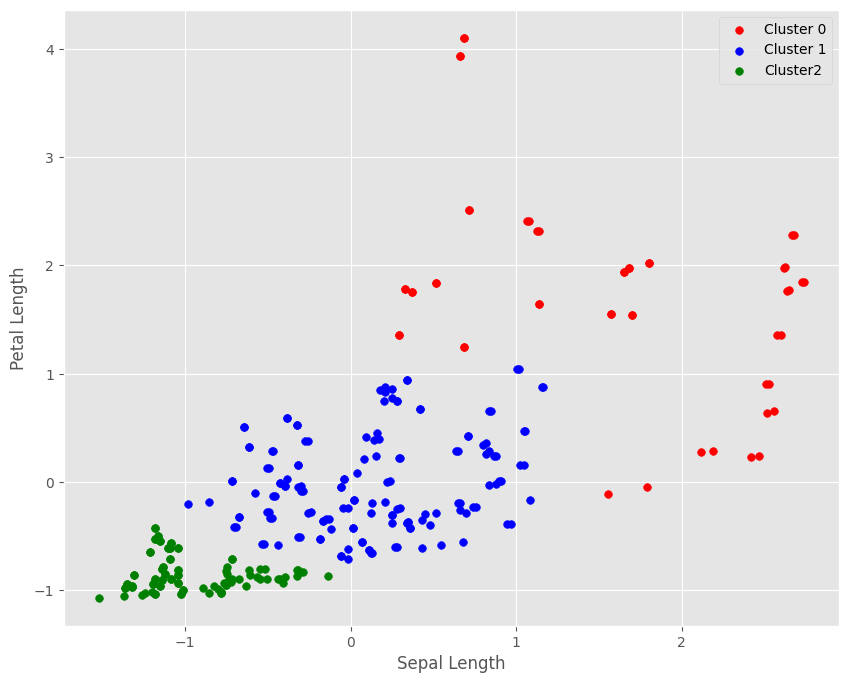

In [73]:
plt.figure(figsize=(10, 8))
plt.scatter(x_scaled[aggclus == 0,0], 
           x_scaled[aggclus == 0,1],
           s=30,c="red", label="Cluster 0")

plt.scatter(x_scaled[aggclus == 1,0], 
           x_scaled[aggclus == 1,1],
           s=30,c="blue", label="Cluster 1")

plt.scatter(x_scaled[aggclus == 2,0], 
           x_scaled[aggclus == 2,1],
           s=30,c="green", label="Cluster2")

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()